In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('/content/drive/MyDrive/train_ctrUa4K.csv')
test=pd.read_csv('/content/drive/MyDrive/test_lAUu6dG.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.shape

(614, 13)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
train.describe(include=object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


Text(0, 0.5, 'Loan_Amount')

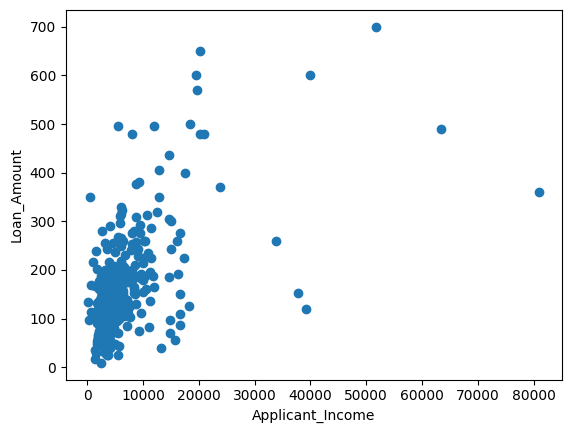

In [8]:
plt.scatter(train.ApplicantIncome,train.LoanAmount)
plt.xlabel('Applicant_Income')
plt.ylabel('Loan_Amount')

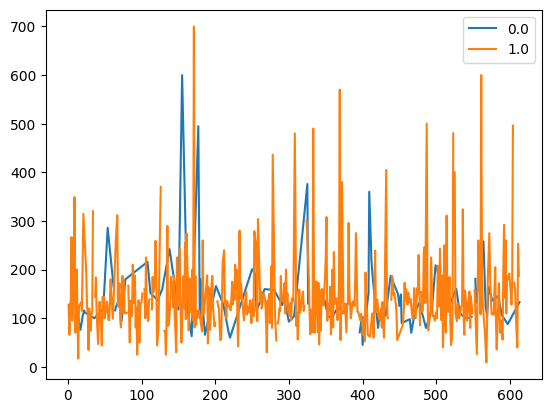

In [9]:
train.groupby('Credit_History').LoanAmount.plot()
plt.legend()


In [10]:
train=train.drop('Loan_ID',axis=1)

In [11]:
train.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
train[train.Gender.isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [13]:
train[train.Gender=='Male'].Loan_Status.value_counts()

Y    339
N    150
Name: Loan_Status, dtype: int64

In [14]:
train[train.Gender=='Female'].Loan_Status.value_counts()

Y    75
N    37
Name: Loan_Status, dtype: int64

In [15]:
train.Gender.mode()

0    Male
Name: Gender, dtype: object

In [16]:
train.Married.mode()

0    Yes
Name: Married, dtype: object

In [17]:
train.Gender=train.Gender.fillna('Male')
train.Married=train.Married.fillna('Yes')

In [18]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [19]:
train.Dependents=train.Dependents.fillna('0') #most applicants have zero dependents

In [20]:
train[train.Self_Employed.isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


In [21]:
train[train.Self_Employed=='No'].Loan_Status.value_counts()

Y    343
N    157
Name: Loan_Status, dtype: int64

In [22]:
train[train.Self_Employed=='Yes'].Loan_Status.value_counts()

Y    56
N    26
Name: Loan_Status, dtype: int64

In [23]:
train.Self_Employed.mode()

0    No
Name: Self_Employed, dtype: object

In [24]:
train.Self_Employed=train.Self_Employed.fillna('No')

In [25]:
train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [26]:
train.Loan_Amount_Term.mode()

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [27]:
train.Loan_Amount_Term=train.Loan_Amount_Term.fillna(360)

<Axes: >

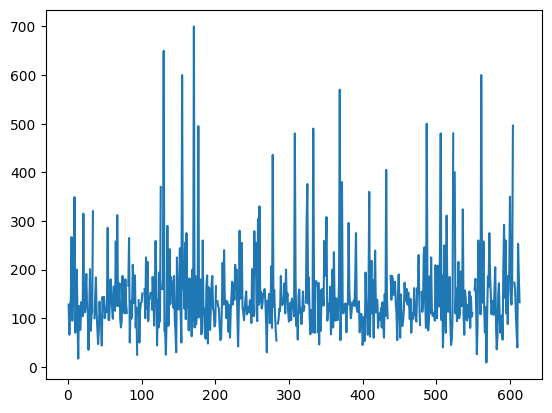

In [28]:
train.LoanAmount.plot()

In [29]:
train.LoanAmount=train.LoanAmount.fillna(train.LoanAmount.mean())

In [30]:
train.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [31]:
train[train.Credit_History==1].Loan_Status.value_counts()

Y    378
N     97
Name: Loan_Status, dtype: int64

In [32]:
train[train.Credit_History==0].Loan_Status.value_counts()

N    82
Y     7
Name: Loan_Status, dtype: int64

In [33]:
for i in train.Loan_Status:
  if i=='Yes':
    train.Credit_History=train.Credit_History.fillna(1)
  else:
    train.Credit_History=train.Credit_History.fillna(0)


In [34]:
train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

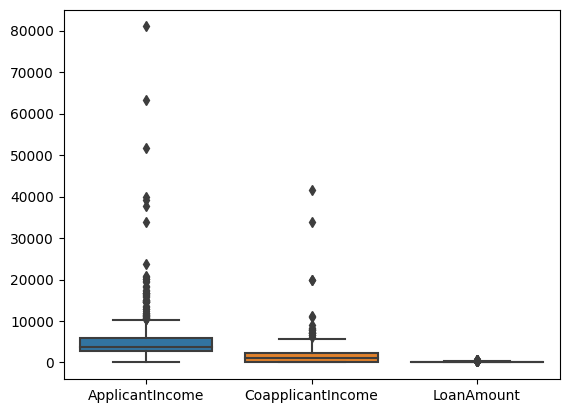

In [35]:
sns.boxplot(train[['ApplicantIncome','CoapplicantIncome','LoanAmount']])

In [36]:
#Outlier not removed

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train.Gender=le.fit_transform(train.Gender)
train.Married=le.fit_transform(train.Married)
train.Dependents=le.fit_transform(train.Dependents)
train.Education=le.fit_transform(train.Education)
train.Self_Employed=le.fit_transform(train.Self_Employed)
train.Credit_History=le.fit_transform(train.Credit_History)
train.Property_Area=le.fit_transform(train.Property_Area)


In [38]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,Y
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,N
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,Y
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,Y
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,Y


In [39]:
x=train.drop('Loan_Status',axis=1)
y=train['Loan_Status']

In [40]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)

In [41]:
type(x)

numpy.ndarray

In [42]:
x=pd.DataFrame(x)

In [43]:
x

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.198860,0.743590,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.743590,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.743590,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,0.0,0.0,0.034014,0.000000,0.089725,0.743590,1.0,0.0
610,1.0,1.0,1.000000,0.0,0.0,0.048930,0.000000,0.044863,0.358974,1.0,0.0
611,1.0,1.0,0.333333,0.0,0.0,0.097984,0.005760,0.353111,0.743590,1.0,1.0
612,1.0,1.0,0.666667,0.0,0.0,0.091936,0.000000,0.257598,0.743590,1.0,1.0


In [44]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [45]:
x.columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

In [46]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.198860,0.743590,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.743590,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.743590,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,0.0,0.0,0.034014,0.000000,0.089725,0.743590,1.0,0.0
610,1.0,1.0,1.000000,0.0,0.0,0.048930,0.000000,0.044863,0.358974,1.0,0.0
611,1.0,1.0,0.333333,0.0,0.0,0.097984,0.005760,0.353111,0.743590,1.0,1.0
612,1.0,1.0,0.666667,0.0,0.0,0.091936,0.000000,0.257598,0.743590,1.0,1.0


In [47]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [48]:
test.shape

(367, 12)

In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [50]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [51]:
test.describe(include=object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,367,356,367,357,367,344,367
unique,367,2,2,4,2,2,3
top,LP001015,Male,Yes,0,Graduate,No,Urban
freq,1,286,233,200,283,307,140


In [52]:
test=test.drop('Loan_ID',axis=1)

In [53]:
test.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [54]:
test.Gender.value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [55]:
test.Gender=test.Gender.fillna('Male')

In [56]:
test.Self_Employed.value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [57]:
test.Self_Employed=test.Self_Employed.fillna('No')

In [58]:
test.Credit_History.value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [59]:
test.Credit_History=test.Credit_History.fillna(1.0)

In [60]:
test.Dependents.value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [61]:
test.Dependents=test.Dependents.fillna('0')

In [62]:
test.Loan_Amount_Term.value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [63]:
test.Loan_Amount_Term=test.Loan_Amount_Term.fillna(360.0)

In [64]:
test.LoanAmount=test.LoanAmount.fillna(test.LoanAmount.mean())

In [65]:
test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<Axes: >

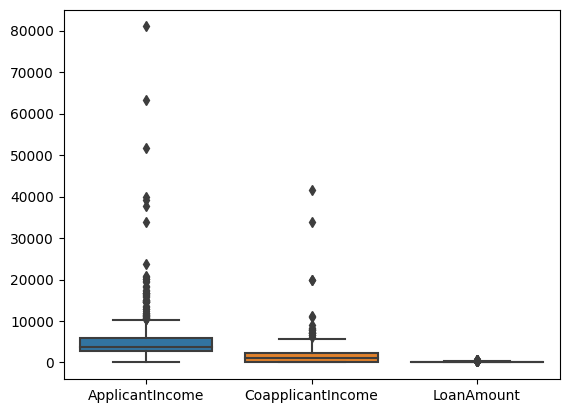

In [66]:
sns.boxplot(train[['ApplicantIncome','CoapplicantIncome','LoanAmount']])

In [67]:
#Outlier not removed

In [68]:
test.Gender=le.fit_transform(test.Gender)
test.Married=le.fit_transform(test.Married)
test.Dependents=le.fit_transform(test.Dependents)
test.Education=le.fit_transform(test.Education)
test.Self_Employed=le.fit_transform(test.Self_Employed)
test.Credit_History=le.fit_transform(test.Credit_History)
test.Property_Area=le.fit_transform(test.Property_Area)

In [69]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0,1))
test=min_max.fit_transform(test)

In [70]:
type(test)

numpy.ndarray

In [71]:
X_test=pd.DataFrame(test)

In [72]:
X_test.columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

In [73]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1.0,0.000000,0.0,0.0,0.078865,0.000000,0.157088,0.746835,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.042411,0.062500,0.187739,0.746835,1.0,1.0
2,1.0,1.0,0.666667,0.0,0.0,0.068938,0.075000,0.344828,0.746835,1.0,1.0
3,1.0,1.0,0.666667,0.0,0.0,0.032263,0.106083,0.137931,0.746835,1.0,1.0
4,1.0,0.0,0.000000,1.0,0.0,0.045168,0.000000,0.095785,0.746835,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,1.0,1.000000,1.0,1.0,0.055274,0.074042,0.162835,0.746835,1.0,1.0
363,1.0,1.0,0.000000,0.0,0.0,0.057329,0.029542,0.166667,0.746835,1.0,1.0
364,1.0,0.0,0.000000,0.0,0.0,0.044810,0.083042,0.187739,0.746835,1.0,0.5
365,1.0,1.0,0.000000,0.0,0.0,0.068938,0.099708,0.249042,0.746835,1.0,0.0


In [74]:
#Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [76]:
from sklearn.model_selection import KFold

kfold_validator=KFold(10)

from sklearn.model_selection import cross_val_score
cv_result=cross_val_score(lr,x,y,cv=kfold_validator)
cv_result

array([0.77419355, 0.82258065, 0.74193548, 0.72580645, 0.7704918 ,
       0.68852459, 0.80327869, 0.7704918 , 0.7704918 , 0.83606557])

In [77]:
np.mean(cv_result)

0.770386039132734

In [151]:
lr_model=lr.fit(x,y)

In [152]:
y_predictions=lr_model.predict(X_test)

In [153]:
y_predictions=pd.DataFrame(y_predictions)

In [154]:
loanpredictions4=pd.read_csv('/content/drive/MyDrive/sample_submission_49d68Cx.csv')

In [156]:
loanpredictions4

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [157]:
loanpredictions4=loanpredictions4.drop('Loan_Status',axis=1)

In [158]:
loanpredictions4=pd.concat([loanpredictions4,y_predictions],axis=1)

In [159]:
loanpredictions4.columns=['Loan_ID','Loan_Status']

In [ ]:
loanpredictions4.to_csv('/content/drive/MyDrive/loanpredictions4.csv',index=False)

In [78]:
#KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knn_clf=KNeighborsClassifier()

In [81]:
cv_result=cross_val_score(knn_clf,x,y,cv=kfold_validator)
cv_result

array([0.75806452, 0.79032258, 0.72580645, 0.70967742, 0.7704918 ,
       0.63934426, 0.78688525, 0.63934426, 0.80327869, 0.75409836])

In [82]:
np.mean(cv_result)

0.7377313590692756

In [83]:
#SVM

In [84]:
from sklearn.svm import SVC
svmclf=SVC()

In [85]:
cv_result=cross_val_score(svmclf,x,y,cv=kfold_validator)
cv_result

array([0.77419355, 0.82258065, 0.74193548, 0.72580645, 0.7704918 ,
       0.68852459, 0.78688525, 0.7704918 , 0.7704918 , 0.83606557])

In [86]:
np.mean(cv_result)

0.7687466948704389

In [87]:
#Decision Trees

In [88]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()

In [89]:
cv_result=cross_val_score(dt_clf,x,y,cv=kfold_validator)
cv_result

array([0.69354839, 0.75806452, 0.61290323, 0.58064516, 0.7704918 ,
       0.72131148, 0.78688525, 0.6557377 , 0.75409836, 0.62295082])

In [90]:
np.mean(cv_result)

0.6956636700158646

In [91]:
#RandomForest

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()

In [93]:
cv_result=cross_val_score(rf_clf,x,y,cv=kfold_validator)
cv_result

array([0.69354839, 0.79032258, 0.69354839, 0.69354839, 0.73770492,
       0.73770492, 0.73770492, 0.70491803, 0.78688525, 0.78688525])

In [94]:
np.mean(cv_result)

0.7362771020624008

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [97]:
#HyperParameter Tuning-Random Forest

In [98]:
from sklearn.model_selection import RandomizedSearchCV

In [99]:
n_estimators = [int(x) for x in np.linspace(start=20, stop=200, num=10)]
max_features = ['auto','sqrt','log2']
max_depth = [int(x) for x in np.linspace(start=10, stop=100, num=10)]
min_samples_split = [2,5,10,14]
min_samples_leaf = [1,2,4,6,8]

In [100]:
random_grid = {'n_estimators':n_estimators,
               'max_features' :max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion': ['entropy','gini','log_loss']}

In [101]:
rf_randomcv = RandomizedSearchCV(estimator = rf_clf,param_distributions=random_grid,
                                 n_iter = 100, cv=3, verbose=2,random_state=100, n_jobs=-1)

rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini',
                                                      'log_loss'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                                         120, 140, 160, 180,
                                                         200]},
                   random_state=100, verbose=2)

In [102]:
best_random = rf_randomcv.best_estimator_
best_random

RandomForestClassifier(max_depth=90, max_features='auto', min_samples_leaf=2,
                       n_estimators=80)

In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
prediction = best_random.predict(x_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[19 24]
 [ 7 73]]
0.7479674796747967
              precision    recall  f1-score   support

           N       0.73      0.44      0.55        43
           Y       0.75      0.91      0.82        80

    accuracy                           0.75       123
   macro avg       0.74      0.68      0.69       123
weighted avg       0.74      0.75      0.73       123



In [104]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf']+2,
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'],
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100,
                     rf_randomcv.best_params_['n_estimators'],
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}


In [ ]:
grid_search = GridSearchCV(estimator=rf_clf,param_grid = param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

In [106]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=90, max_features='auto', min_samples_leaf=6,
                       min_samples_split=3, n_estimators=180)

In [107]:
prediction1 = best_grid.predict(x_test)
print(confusion_matrix(y_test,prediction1))
print(accuracy_score(y_test,prediction1))
print(classification_report(y_test,prediction1))


[[20 23]
 [ 7 73]]
0.7560975609756098
              precision    recall  f1-score   support

           N       0.74      0.47      0.57        43
           Y       0.76      0.91      0.83        80

    accuracy                           0.76       123
   macro avg       0.75      0.69      0.70       123
weighted avg       0.75      0.76      0.74       123



In [108]:
y_predictions=best_grid.predict(X_test)

In [109]:
y_predictions

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [110]:
Loan_Status=pd.DataFrame(y_predictions)

In [111]:
loanpredictions1=pd.read_csv('/content/drive/MyDrive/sample_submission_49d68Cx.csv')

In [112]:
loanpredictions1

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [113]:
loanpredictions1=loanpredictions1.drop('Loan_Status',axis=1)


In [114]:
loanpredictions1=pd.concat([loanpredictions1,Loan_Status],axis=1)

In [115]:
loanpredictions1

,Loan_ID,0
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [116]:
loanpredictions1.columns=['Loan_ID','Loan_Status']


In [117]:
loanpredictions1

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [118]:
loanpredictions1.to_csv(r'/content/drive/MyDrive/loanpredictions1.csv',index=False)

In [119]:
#Hyperparameter Tuning-SVM

In [120]:
random_grid = {'kernel': ['linear','polynomial','rbf']}

In [121]:
rf_randomcv = RandomizedSearchCV(estimator =svmclf,param_distributions=random_grid,
                                 n_iter = 100, cv=3, verbose=2,random_state=100, n_jobs=-1)

rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=100. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 9.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in 

RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'kernel': ['linear', 'polynomial',
                                                   'rbf']},
                   random_state=100, verbose=2)

In [122]:
best_random = rf_randomcv.best_estimator_

In [123]:
best_random

SVC(kernel='linear')

In [124]:
prediction2 = best_random.predict(x_test)
print(confusion_matrix(y_test,prediction2))
print(accuracy_score(y_test,prediction2))
print(classification_report(y_test,prediction2))

[[22 21]
 [ 7 73]]
0.7723577235772358
              precision    recall  f1-score   support

           N       0.76      0.51      0.61        43
           Y       0.78      0.91      0.84        80

    accuracy                           0.77       123
   macro avg       0.77      0.71      0.73       123
weighted avg       0.77      0.77      0.76       123



In [125]:
y_predictions=best_random.predict(X_test)

In [126]:
y_predictions

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [127]:
y_predictions=pd.DataFrame(y_predictions)

In [128]:
loanpredictions2=pd.read_csv('/content/drive/MyDrive/sample_submission_49d68Cx.csv')

In [129]:
loanpredictions2=loanpredictions2.drop('Loan_Status',axis=1)

In [130]:
loanpredictions2=pd.concat([loanpredictions2,y_predictions],axis=1)

In [131]:
loanpredictions2

,Loan_ID,0
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [132]:
loanpredictions2.columns=['Loan_ID','Loan_Status']

In [133]:
loanpredictions2.to_csv(r'/content/drive/MyDrive/loanpredictions2.csv',index=False)

In [134]:
#HyperParameter Tuning-KNN

In [135]:
random_grid = {'n_neighbors':np.arange(3,20),
               'metric': ['minkowski','euclidean','manhattan']}

In [136]:
rf_randomcv = RandomizedSearchCV(estimator = knn_clf,param_distributions=random_grid,
                                 n_iter = 100, cv=3, verbose=2,random_state=100, n_jobs=-1)

rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 51 candidates, totalling 153 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 51 is smaller than n_iter=100. Running 51 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
                   random_state=100, verbose=2)

In [137]:
best_random = rf_randomcv.best_estimator_

In [138]:
best_random

KNeighborsClassifier(metric='manhattan', n_neighbors=13)

In [139]:
prediction3 = best_random.predict(x_test)
print(confusion_matrix(y_test,prediction3))
print(accuracy_score(y_test,prediction3))
print(classification_report(y_test,prediction3))

[[20 23]
 [ 8 72]]
0.7479674796747967
              precision    recall  f1-score   support

           N       0.71      0.47      0.56        43
           Y       0.76      0.90      0.82        80

    accuracy                           0.75       123
   macro avg       0.74      0.68      0.69       123
weighted avg       0.74      0.75      0.73       123



In [140]:
y_predictions=best_random.predict(X_test)

In [141]:
y_predictions

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [142]:
y_predictions=pd.DataFrame(y_predictions)

In [143]:
loanpredictions3=pd.read_csv('/content/drive/MyDrive/sample_submission_49d68Cx.csv')

In [144]:
loanpredictions3=loanpredictions3.drop('Loan_Status',axis=1)

In [145]:
loanpredictions3=pd.concat([loanpredictions3,y_predictions],axis=1)

In [146]:
loanpredictions3

,Loan_ID,0
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [147]:
loanpredictions3.columns=['Loan_ID','Loan_Status']

In [148]:
loanpredictions3.to_csv(r'/content/drive/MyDrive/loanpredictions3.csv',index=False)